# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url=f"{url}?q={city}&appid={weather_api_key}&units=metric"
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url).json()
        #weather_json = weather_response.json()

        city_lat = []
        city_lng = []
        temp = []

      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (weather_response['coord']['lat'])
        city_lng = (weather_response['coord']['lon'])
        city_max_temp = (weather_response['main']['temp_max'])
        city_humidity = (weather_response['main']['humidity'])
        city_clouds = (weather_response['clouds']['all'])
        city_wind =(weather_response['wind']['speed'])
        city_country = (weather_response['sys']['country'])
        city_date = (weather_response['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | muisne
Processing Record 3 of Set 1 | flying fish cove
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | gao
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | nimigea de sus
Processing Record 12 of Set 1 | whistler
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | krasnik
Processing Record 17 of Set 1 | aykhal
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | we
City not found. Skipping...
Processing Record 22 of Set 1 | hom

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.90,83,88,1.79,NZ,1682532073
1,muisne,0.6000,-80.0333,28.96,70,59,3.50,EC,1682532075
2,flying fish cove,-10.4217,105.6791,27.28,77,100,4.69,CX,1682532077
3,blackmans bay,-43.0167,147.3167,14.29,75,90,3.97,AU,1682531636
4,papatowai,-46.5619,169.4708,10.90,87,67,5.34,NZ,1682531659
...,...,...,...,...,...,...,...,...,...
543,kovdor,67.5662,30.4758,-2.09,95,99,1.68,RU,1682532247
544,rongelap,11.1635,166.8941,26.99,80,98,9.33,MH,1682531717
545,prainha,-1.8000,-53.4800,26.96,90,96,0.52,BR,1682532248
546,aitape,-3.1374,142.3475,25.16,90,90,2.27,PG,1682532248


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.90,83,88,1.79,NZ,1682532073
1,muisne,0.6000,-80.0333,28.96,70,59,3.50,EC,1682532075
2,flying fish cove,-10.4217,105.6791,27.28,77,100,4.69,CX,1682532077
3,blackmans bay,-43.0167,147.3167,14.29,75,90,3.97,AU,1682531636
4,papatowai,-46.5619,169.4708,10.90,87,67,5.34,NZ,1682531659


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,83,88,1.79,NZ,1682532073
1,muisne,0.6000,-80.0333,28.96,70,59,3.50,EC,1682532075
2,flying fish cove,-10.4217,105.6791,27.28,77,100,4.69,CX,1682532077
3,blackmans bay,-43.0167,147.3167,14.29,75,90,3.97,AU,1682531636
4,papatowai,-46.5619,169.4708,10.90,87,67,5.34,NZ,1682531659


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

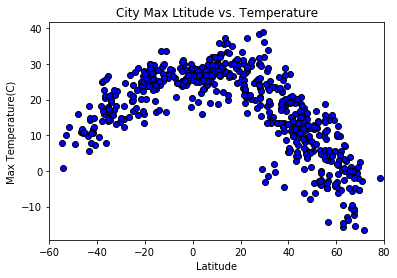

In [8]:
# Build scatter plot for latitude vs. temperature

#filtered_data = city_data_df[['Lat','Max Temp']]
Lat_list = city_data_df['Lat'].values.tolist()
Temp_list = city_data_df['Max Temp'].values.tolist()


# Incorporate the other graph properties

plt.scatter(Lat_list, Temp_list, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(0,40)
plt.xlim(-60,80)
plt.title("City Max Ltitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

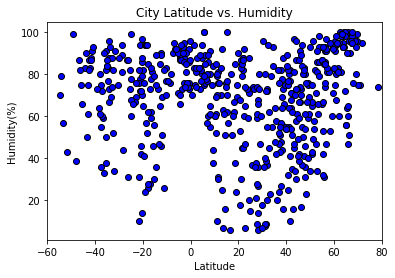

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
Lat_list = city_data_df['Lat'].values.tolist()
Humidity_list = city_data_df['Humidity'].values.tolist()


# Incorporate the other graph properties

plt.scatter(Lat_list, Humidity_list, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(0,40)
plt.xlim(-60,80)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

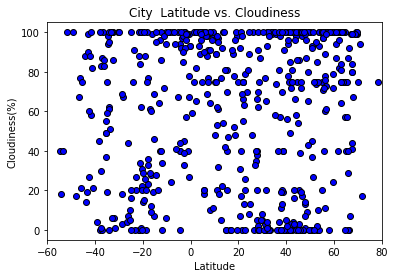

In [10]:
# Build the scatter plots for latitude vs. cloudiness

Lat_list = city_data_df['Lat'].values.tolist()
Cloudiness_list = city_data_df['Cloudiness'].values.tolist()


# Incorporate the other graph properties

plt.scatter(Lat_list, Cloudiness_list, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(0,40)
plt.xlim(-60,80)
plt.title("City  Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

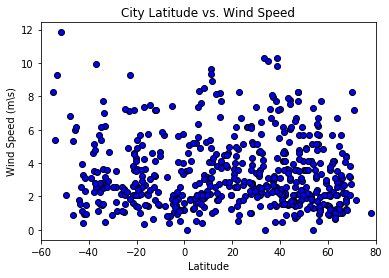

In [11]:
# Build the scatter plots for latitude vs. wind speed

Lat_list = city_data_df['Lat'].values.tolist()
Wind_speed_list = city_data_df['Wind Speed'].values.tolist()


# Incorporate the other graph properties

plt.scatter(Lat_list, Wind_speed_list, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(0,40)
plt.xlim(-60,80)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m\s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

northern_hemi_df = city_data_df.loc[ city_data_df["Lat"] >=0]
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,muisne,0.6000,-80.0333,28.96,70,59,3.50,EC,1682532075
6,talnakh,69.4865,88.3972,-5.44,99,99,2.72,RU,1682531635
8,gao,16.6362,1.6370,35.13,6,0,4.51,ML,1682532078
10,nimigea de sus,47.2833,24.3167,5.87,83,100,2.15,RO,1682532079
11,whistler,50.1164,-122.9695,5.57,93,100,3.60,CA,1682532079


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[ city_data_df["Lat"] <=0]

#Display Sample Data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,83,88,1.79,NZ,1682532073
2,flying fish cove,-10.4217,105.6791,27.28,77,100,4.69,CX,1682532077
3,blackmans bay,-43.0167,147.3167,14.29,75,90,3.97,AU,1682531636
4,papatowai,-46.5619,169.4708,10.90,87,67,5.34,NZ,1682531659
5,adamstown,-25.0660,-130.1015,24.05,60,16,2.45,PN,1682531629


###  Temperature vs. Latitude Linear Regression Plot

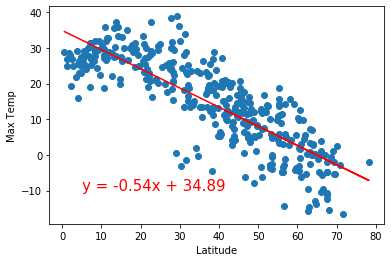

The r-value is: 0.6989182342553508
y = -0.54x + 34.89


In [14]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

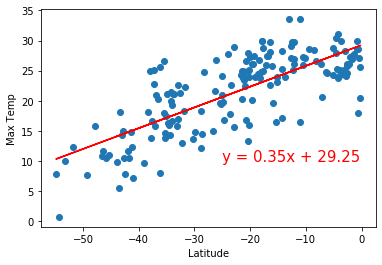

The r-value is: 0.574753743097322
y = 0.35x + 29.25


In [15]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

Temperature vs Latitude Regression Plot

 The sign of a linear regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).



### Humidity vs. Latitude Linear Regression Plot

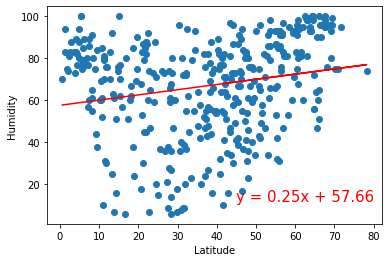

The r-value is: 0.04126250494470186
y = 0.25x + 57.66


In [16]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

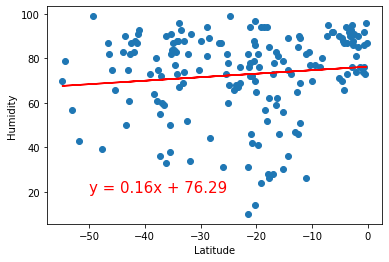

The r-value is: 0.013238625913747136
y = 0.16x + 76.29


In [17]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

Humidity vs Latitude Regression Plot

 The sign of a linear regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).



### Cloudiness vs. Latitude Linear Regression Plot

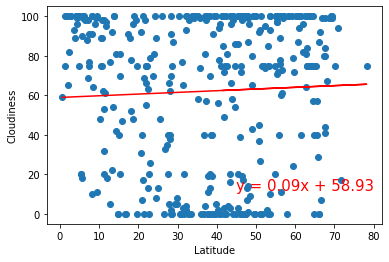

The r-value is: 0.0019156306107002263
y = 0.09x + 58.93


In [18]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

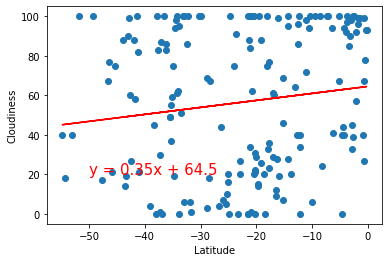

The r-value is: 0.018998043474376492
y = 0.35x + 64.5


In [19]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

Cloudiness vs Latitude Regression Plot

 The sign of a linear regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).



### Wind Speed vs. Latitude Linear Regression Plot

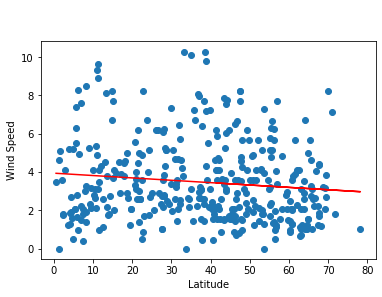

The r-value is: 0.013046712419006417
y = -0.01x + 3.94


In [20]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

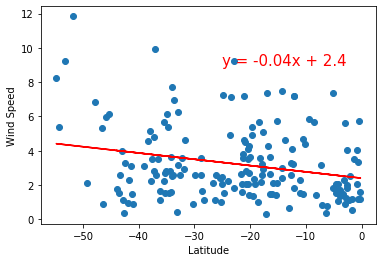

The r-value is: 0.05899410878582851
y = -0.04x + 2.4


In [21]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is: {rvalue**2}")
print (line_eq)

Wind Speed vs Latitude Regression Plot

 The sign of a linear regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

